# Trabajo Práctico N°1 Aprendizaje Automático 1#
## Integrantes ##
1. López Ceratto, Julieta : L-3311/1
2. Rodríguez Griñó, Tomás : R-4643/4
3. Slepoy, David: S-5782/7

Importamos librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn import metrics
import warnings
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

## PUNTO 1


In [133]:
df = pd.read_csv('src\weatherAUS.csv', sep = ',')

In [134]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Datos Faltantes

In [135]:
df.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Eliminamos las filas donde los datos faltantes son null en la variable a predecir

In [136]:
df['RainTomorrow'].isnull().sum() / len(df)

0.02245978275814657

In [137]:
df = df.dropna(subset=['RainTomorrow'])

In [138]:
df.isnull().sum()


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

## Agregamos columnas "Mes" y "Estación"
Estas columnas corresponden al mes y estación del año, se utilizará mas adelante

In [139]:
#Primero convertimos el tipo de dato de Date a fecha
df['Date'] = pd.to_datetime(df['Date'])

In [140]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df['Month'] = df['Date'].dt.month.apply(lambda x: meses[x - 1])

In [141]:
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    elif mes in [9, 10, 11]:
        return 'Primavera'
    
df['Season'] = df['Date'].dt.month.apply(obtener_estacion)

## Division del conjunto de datos ##

In [142]:
# Definir X e y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [143]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.3, random_state= 41)

### Datos faltantes ###

In [144]:
X_train.isnull().sum()

Date                 0
Location             0
MinTemp            368
MaxTemp            187
Rainfall           821
Evaporation      34135
Sunshine         38046
WindGustDir       5281
WindGustSpeed     5246
WindDir9am        5651
WindDir3pm        2122
WindSpeed9am       763
WindSpeed3pm      1489
Humidity9am       1001
Humidity3pm       2056
Pressure9am       7906
Pressure3pm       7885
Cloud9am         30135
Cloud3pm         32067
Temp9am            504
Temp3pm           1550
RainToday          821
Month                0
Season               0
dtype: int64

Podemos ver que en todas las columnas hay datos faltantes.


Primero vemos que no haya columnas duplicadas.


In [145]:
X_train.duplicated().sum()

0

## Imputación de datos faltantes ##


Los valores nulos tendremos que tratarlos de columna en columna

In [146]:
X_train.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
Month                    object
Season                   object
dtype: object

In [147]:
## Vemos que todos los años y estaciones estan presentes en x_train
X_train['Season'].unique(),len(X_train['Month'].unique())

(array(['Invierno', 'Verano', 'Otoño', 'Primavera'], dtype=object), 12)

### Obtenemos media y moda para los datos segun el mes

In [148]:
# Función para aplicar mediana a columnas numéricas y moda a las no numéricas
def mediana_moda(grupo):
    # Para las columnas numéricas aplicamos la mediana
    numericas = grupo.select_dtypes(include='number').median()
    
    # Para las columnas no numéricas aplicamos la moda
    no_numericas = grupo.select_dtypes(exclude='number').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    # Combinar resultados
    return pd.concat([numericas, no_numericas])

In [149]:
medianas = X_train.groupby('Month').apply(mediana_moda)

### Llenamos datos faltantes segun el valor de mediana o moda que le corresponda al mes

In [150]:
def llenar_faltantes_por_mes(fila, df_mediana_moda):
    mes = fila['Month']
    
    # Iterar sobre las columnas del DataFrame
    for columna in fila.index:
        # Si el valor es nulo, llenarlo con la mediana o moda del mes
        if pd.isnull(fila[columna]):
            if columna in df_mediana_moda.columns:
                fila[columna] = df_mediana_moda.loc[mes, columna]  # Usar la mediana o moda según el tipo
    return fila

In [151]:
X_train = X_train.apply(lambda fila: llenar_faltantes_por_mes(fila, medianas), axis=1)
X_val = X_val.apply(lambda fila: llenar_faltantes_por_mes(fila, medianas), axis=1)
X_test = X_test.apply(lambda fila: llenar_faltantes_por_mes(fila, medianas), axis=1)

No se utilizó KNN vecinos ya que tiene un costo computacional muy alto.

Se eligió tratar de llenar el valor faltante de forma más adecuada posible, esto lo inferimos obteniendo la mediana o moda -según la columna- para cada mes.
El uso del mes como criterio de agrupación ayuda a capturar los patrones estacionales que pueden estar presentes en los datos climáticos.

En datos de clima, por ejemplo, las temperaturas de enero podrían ser muy diferentes a las de julio, por lo que rellenar con la mediana o moda general (sin considerar el mes) no reflejaría adecuadamente las diferencias estacionales; agrupar por mes y reemplazar según ese grupo permite que los valores faltantes se llenen con algo que es más representativo del contexto temporal del dato faltante.

Se evita así también rellenar con datos "atípicos" para un mes o estación del año en particular.

Reemplazar los valores faltantes por la mediana o moda por mes es una técnica que ayuda a preservar la integridad estacional de los datos y a minimizar el impacto de valores extremos.

Criterio explicado segun variable:

- MintTemp y MaxTemp : Se eligio reemplazar los valores nulos por la mediana a pesar de que la distrib no sea muy asimétrica.
- Rainfall : Se eligio reemplazar los valores nulos por la mediana ya que es menos sensible a valores extremos.
- Evaporation y Sunshine: Aunque pueden tener cierta asimetría, la media sigue siendo una buena estimación del valor típico. Tambien porque la evaporación y las horas de sol suelen tener una variación más gradual que la lluvia.
- WindGustDir, WindDir9am y WindDir3pm: Se eligio reemplazar los valores nulos por la moda ya que la moda representa la dirección del viento más común, que es una buena estimación para valores faltantes.
- WindGustSpeed y WindSpeed9am, WindSpeed3pm: Se eligio reeemplazar por la mediana ya que la velocidad del viento puede tener una distribución sesgada, similar a la lluvia. Y la mediana es menos afectada por valores extremos ocasionales de vientos fuertes.
- Humidity9am y Humidity3pm: Se eligio reemplazar por la mediana a pesar que la humedad suele tener una distribución más simétrica que la lluvia o el viento. Y la mediana proporciona una buena estimación del nivel de humedad típico.
- Pressure9am y Pressure3pm: Se eligio reemplazar por la media porque la presión atmosférica tiende a tener una distribución bastante simétrica y los cambios en la presión suelen ser graduales, haciendo de la media una buena representación.
- Cloud9am y Cloud3pm: Se eligio reemplazar por la mediana pues la nubosidad se mide en una escala discreta (octavos), y la mediana proporciona un valor central que es un número entero en la escala de nubosidad.
- Temp9am y Temp3pm: Se eligio reemplazar por la media pues, similarmente a MinTemp y MaxTemp, las temperaturas suelen seguir una distribución aproximadamente normal.
- RainToday : Se eligio la reemplazar por la moda porque es una variable categórica binaria (Sí/No), y la moda representa el resultado más frecuente, que es una buena estimación para un evento binario.

Verificamos que ya no haya valores nulos.

In [152]:
X_train.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
Month            False
Season           False
dtype: bool

## Visualización de datos ##

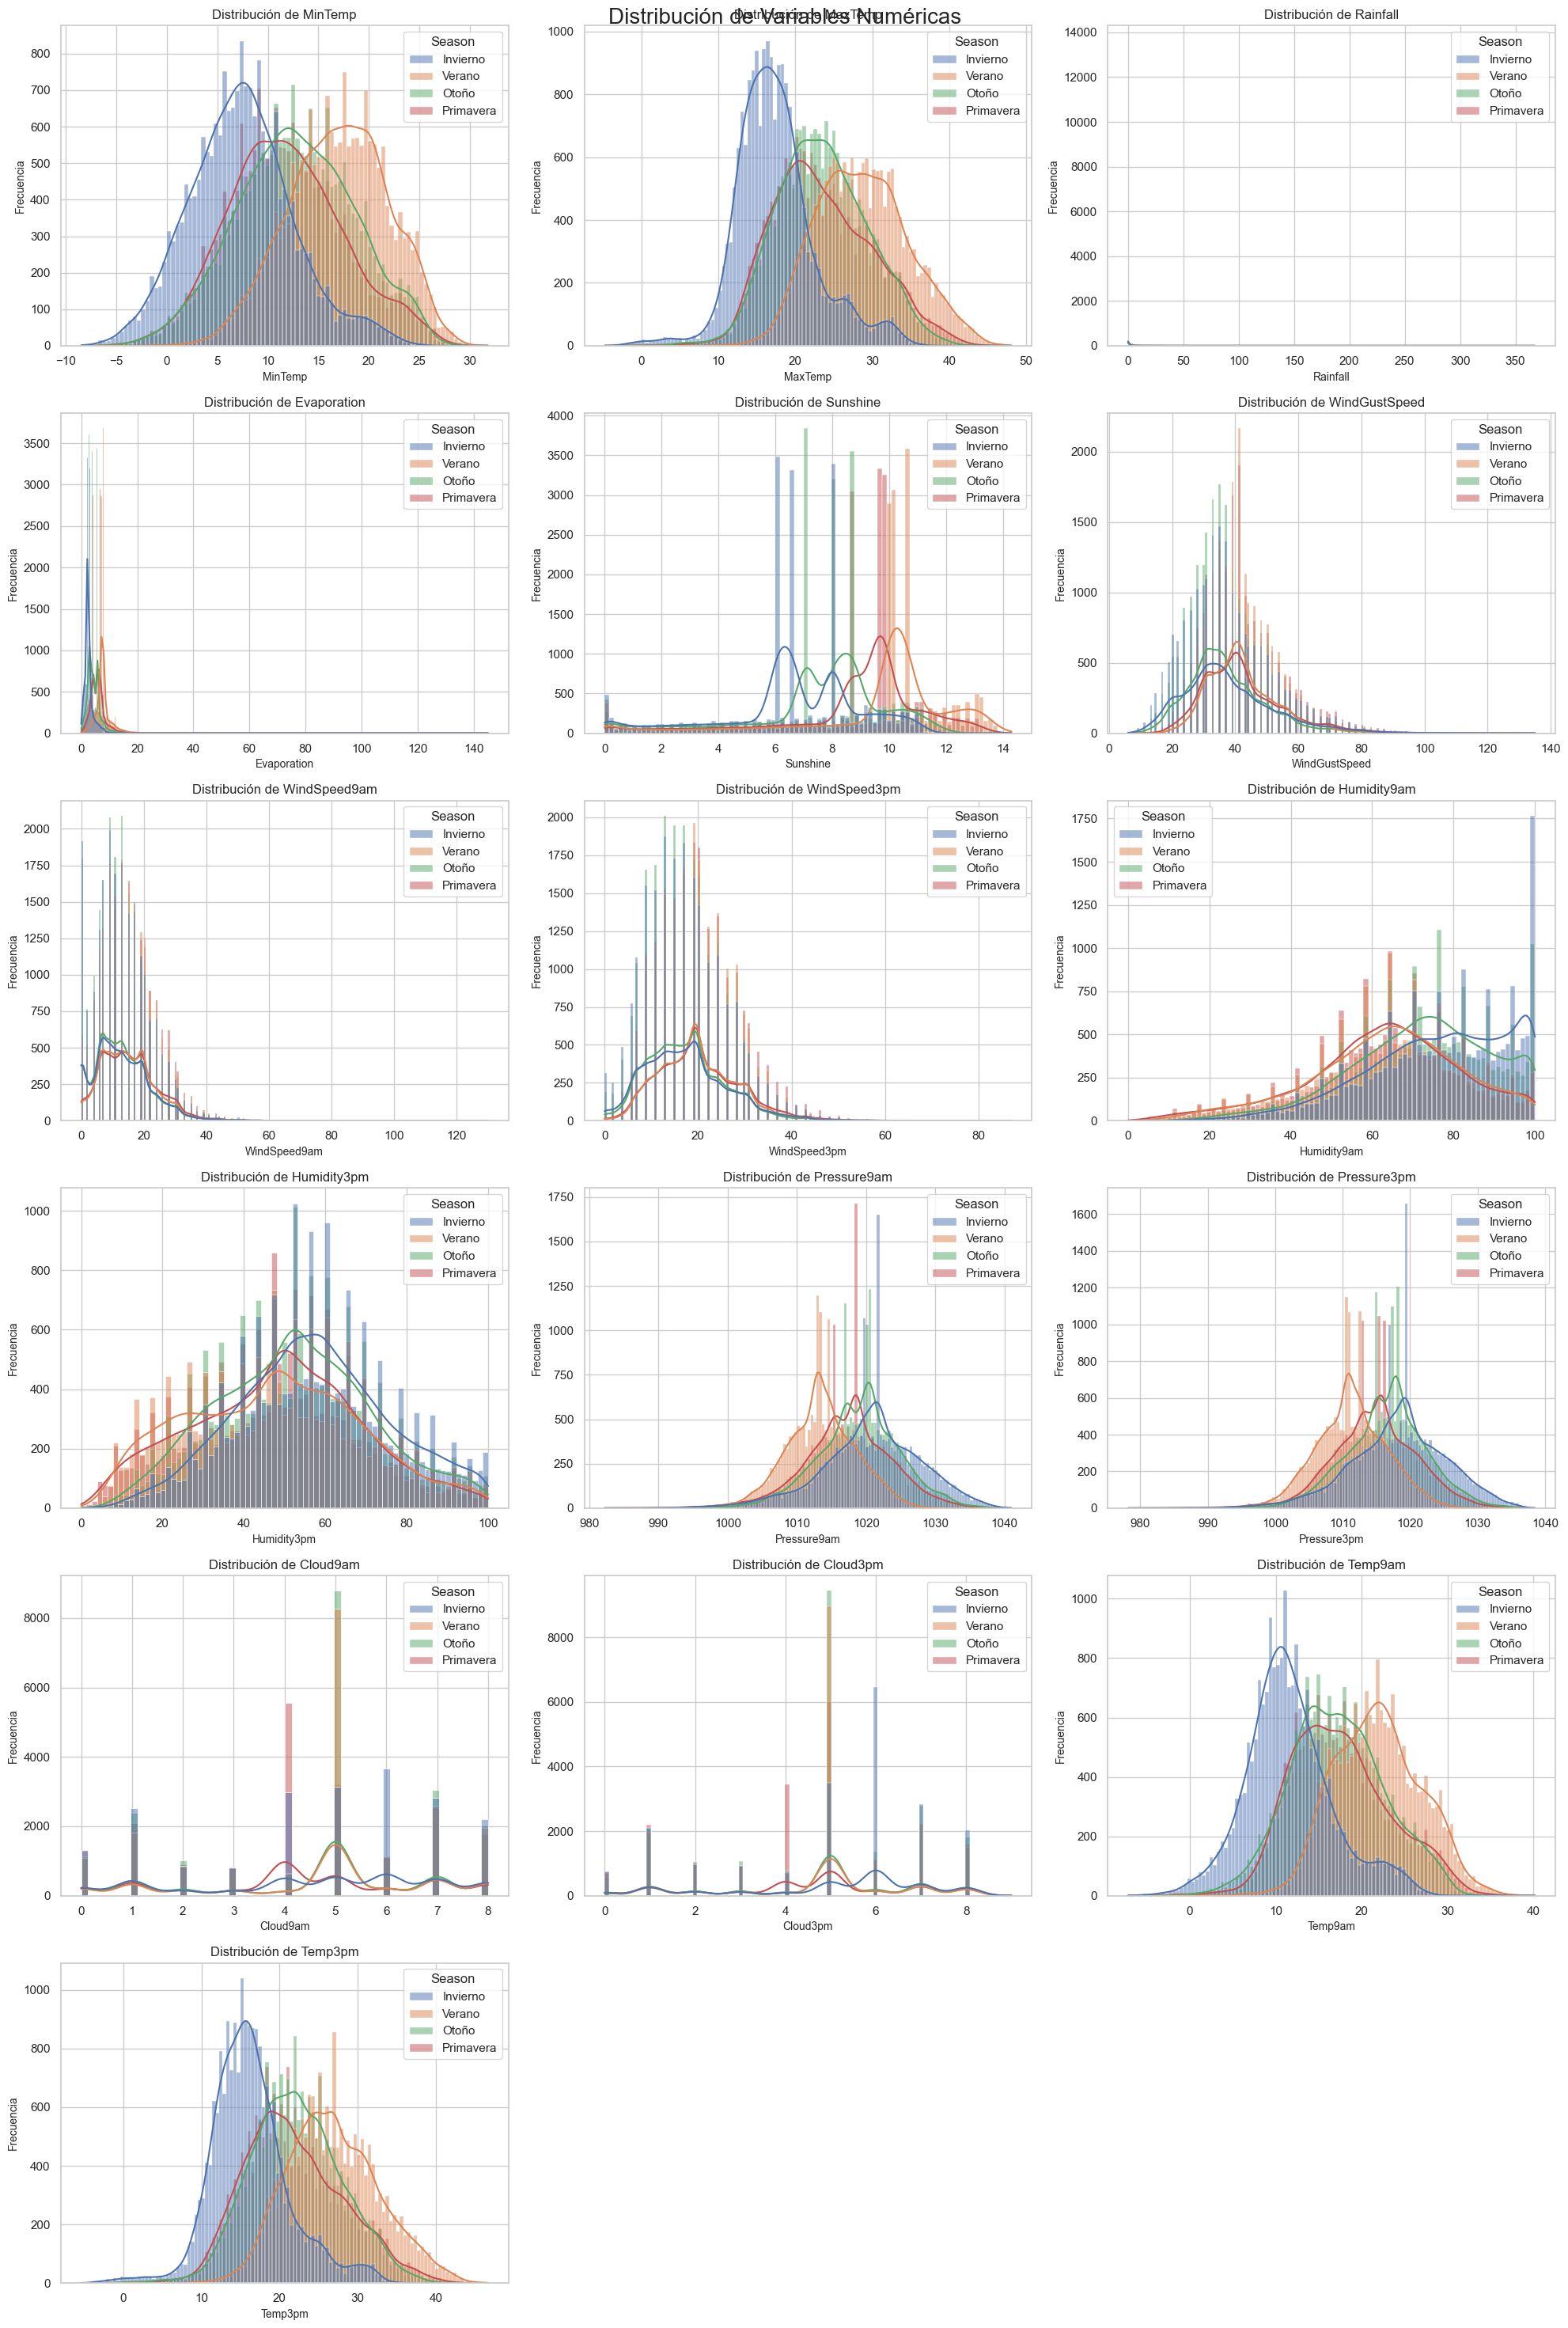

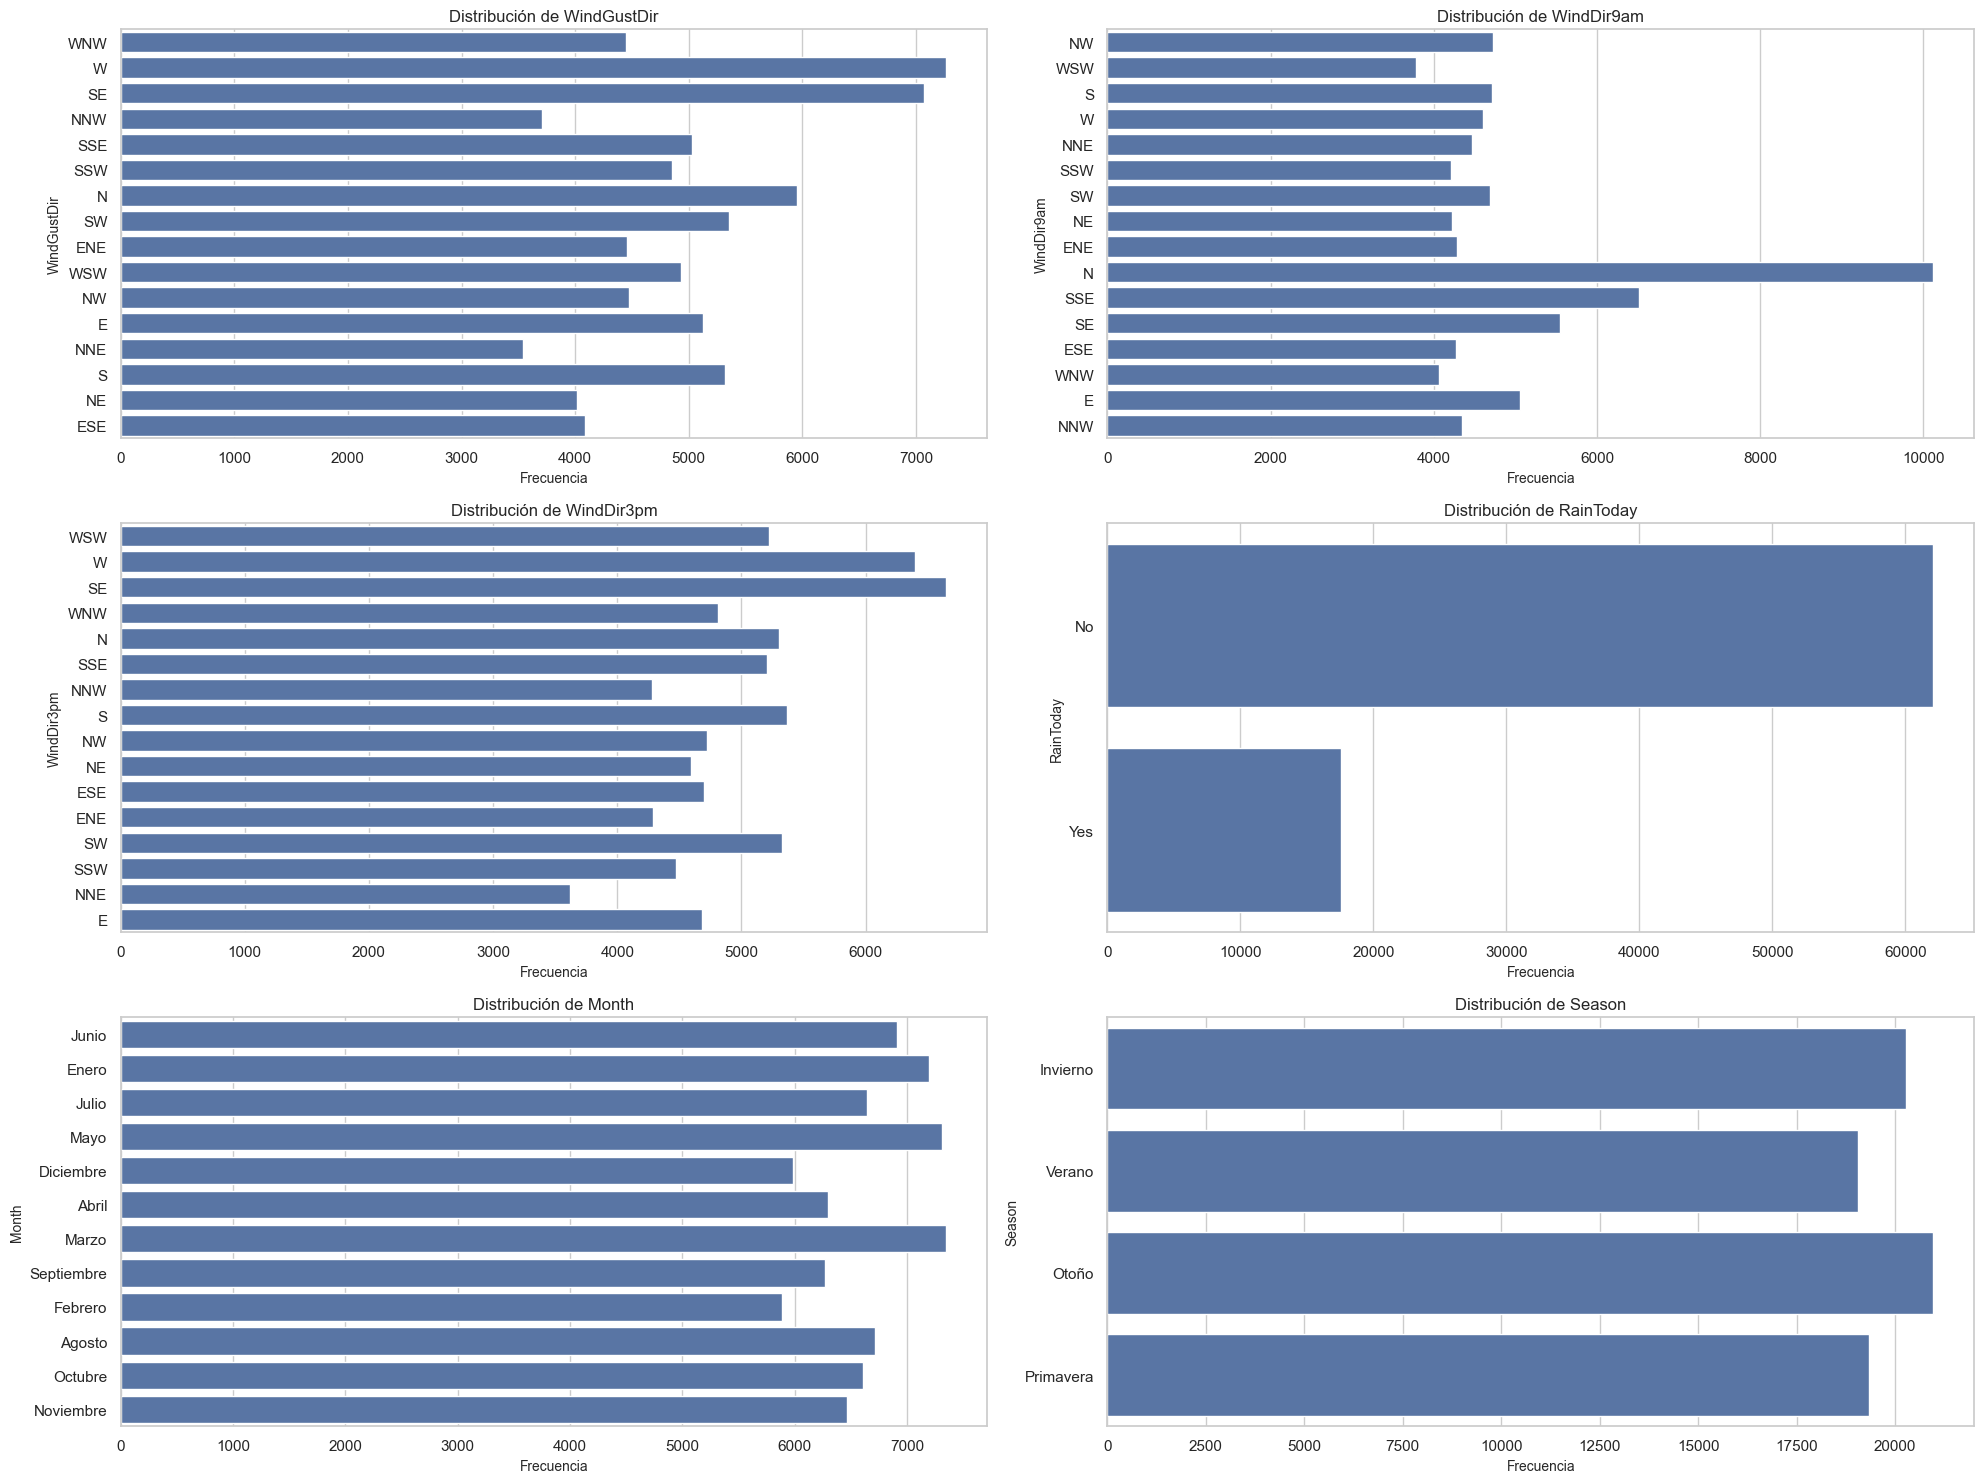

In [153]:
# Seleccionar solo las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Calcular el número de filas y columnas para el subplot
n_cols = 3 
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=20)

# Aplanar el array de axes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Crear un histograma para cada variable numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(X_train, x=column, kde=True, ax=axes[i], hue=X_train['Season'])
    axes[i].set_title(f'Distribución de {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)

# Ocultar subplots vacíos
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Para variables categóricas, excluyendo 'Date' y 'Location'
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col not in ['Date', 'Location']]

# Calcular el número de filas y columnas para el subplot de variables categóricas
n_cols_cat = 2  # Puedes ajustar esto según prefieras
n_rows_cat = math.ceil(len(categorical_columns) / n_cols_cat)

# Crear la figura y los subplots para variables categóricas
fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(20, 5*n_rows_cat))

# Aplanar el array de axes si es necesario
axes = axes.flatten() if n_rows_cat > 1 else [axes]

# Crear un gráfico de barras para cada variable categórica
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=X_train, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}', fontsize=12)
    axes[i].set_xlabel('Frecuencia', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)

# Ocultar subplots vacíos
for i in range(len(categorical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


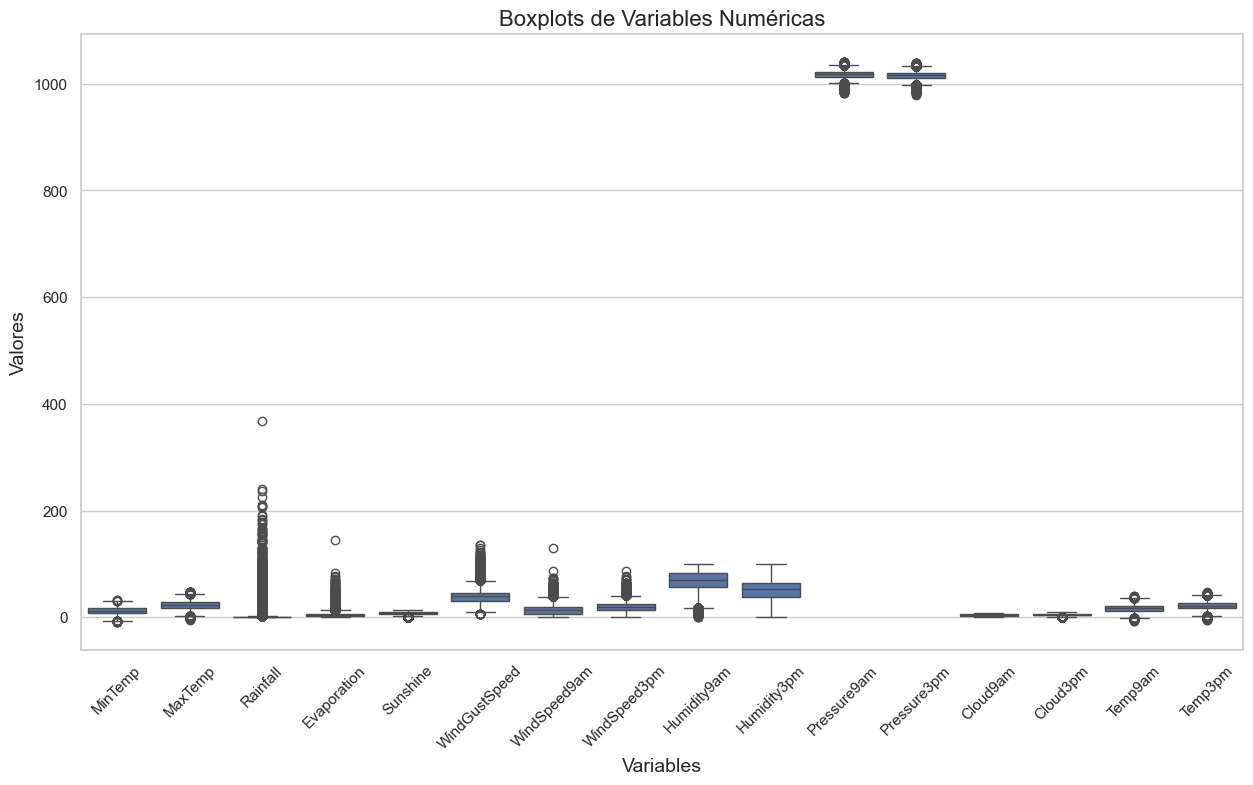

In [154]:
# Seleccionar solo las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Transformar el DataFrame a formato largo
X_train_melted = pd.melt(X_train, value_vars=numeric_columns)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para todas las columnas numéricas en un solo gráfico
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', data=X_train_melted)
plt.title('Boxplots de Variables Numéricas', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

### Descripcion de variables ###

1. MinTemp: Al ser la temperatura mínima diaria en grados Celsius, podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución aproximadamente normal, ligeramente sesgada a la izquierda. La moda parece estar alrededor de los 10-15°C. Aunque no tenemos un boxplot, es probable que haya algunos valores atípicos en ambos extremos, representando días inusualmente fríos o cálidos.
2. MaxTemp: Al ser la temperatura máxima diaria en grados Celsius, podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución aproximadamente normal, posiblemente con un ligero sesgo a la derecha. La moda parece estar alrededor de los 20-25°C. Es probable que haya valores atípicos en el extremo superior, representando días excepcionalmente calurosos.
3. Rainfall: Al ser la cantidad de lluvia registrada en las últimas 24 horas (mm), podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución fuertemente sesgada a la derecha, con una moda muy pronunciada en o cerca de 0 mm. La distribución tiene una cola larga hacia la derecha, indicando días ocasionales de lluvia intensa. Es muy probable que haya numerosos valores atípicos en el extremo superior de la distribución.
4. Evaporation: Al ser la evaporación en las últimas 24 horas (mm), podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución sesgada a la derecha, con la mayoría de los valores concentrados en el rango inferior. La moda parece estar cerca de 2-4 mm. Es probable que haya valores atípicos en el extremo superior, representando días con evaporación excepcionalmente alta.
5. Sunshine: Al ser el número de horas de sol brillante en el día, podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución que podría ser bimodal o uniforme, reflejando la variación estacional en las horas de luz diurna. La distribución probablemente abarca desde 0 hasta 12-14 horas, con picos que podrían corresponder a los patrones de invierno y verano.
6. WindGustSpeed: Al ser la velocidad de la ráfaga de viento más fuerte en las últimas 24 horas (km/h), podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución sesgada a la derecha, con la mayoría de los valores en el rango bajo a medio. La moda parece estar alrededor de 30-40 km/h. Es probable que haya valores atípicos en el extremo superior, representando ráfagas de viento excepcionalmente fuertes.
7. WindSpeed9am y WindSpeed3pm: Al ser la velocidad del viento a las 9 am y 3 pm respectivamente (km/h), podemos observar que son variables cuantitativas, continuas. Ambas muestran distribuciones sesgadas a la derecha, similares a WindGustSpeed pero con valores generalmente más bajos. Las modas probablemente están en el rango de 10-20 km/h. Es probable que haya valores atípicos en los extremos superiores.
8. Humidity9am y Humidity3pm: Al ser el porcentaje de humedad a las 9 am y 3 pm respectivamente, podemos observar que son variables cuantitativas, continuas. Ambas muestran distribuciones que podrían ser bimodales o uniformes, abarcando un rango amplio de valores. Las modas podrían estar alrededor del 60-70% y 40-50% respectivamente. Es menos probable que haya valores atípicos extremos debido a la naturaleza limitada de la escala de porcentaje.
9. Pressure9am y Pressure3pm: Al ser la presión atmosférica a las 9 am y 3 pm respectivamente (hpa), podemos observar que son variables cuantitativas, continuas. Ambas muestran distribuciones aproximadamente normales, centradas alrededor de 1010-1020 hpa. La variación es relativamente pequeña, reflejando la estabilidad general de la presión atmosférica. Es posible que haya algunos valores atípicos en ambos extremos, representando condiciones atmosféricas inusuales.
10. Cloud9am y Cloud3pm: Al ser la fracción de cielo cubierto por nubes a las 9 am y 3 pm respectivamente (octavos), podemos observar que son variables cuantitativas discretas. Las distribuciones probablemente muestran picos en valores específicos (0, 4, 8 octavos), reflejando la naturaleza discreta de la medición. Podría haber una ligera tendencia hacia valores más altos o más bajos dependiendo del clima local.
11. Temp9am y Temp3pm: Al ser la temperatura a las 9 am y 3 pm respectivamente (°C), podemos observar que son variables cuantitativas, continuas. Ambas muestran distribuciones aproximadamente normales, con Temp3pm generalmente más alta y posiblemente con mayor varianza que Temp9am. Las modas probablemente están alrededor de 15-20°C para Temp9am y 20-25°C para Temp3pm. Es probable que haya algunos valores atípicos en ambos extremos, representando días inusualmente fríos o calurosos.
12. RainToday y RainTomorrow: Al ser variables categóricas binarias (Sí/No) que indican si llovió hoy o si lloverá mañana, podemos observar que son variables cualitativas nominales. La distribución muestra dos barras, una para 'Sí' y otra para 'No'. Es probable que la barra de 'No' sea significativamente más alta, indicando que los días sin lluvia son más comunes que los días con lluvia.

Además podemos observar como variables como MinTemp y Maxtemp cambian su comportamiento según la estación del año, corroborando que la decisión sobre el llenado de datos faltantes fue correcta

## Balance del modelo ##

RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


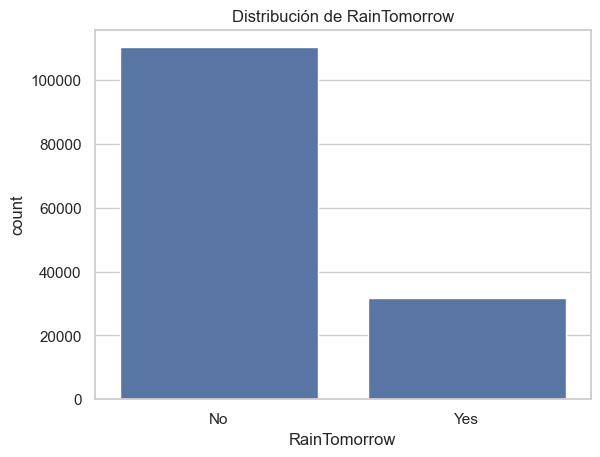

In [155]:
# Verificar el balance de la variable objetivo (RainTomorrow)
print(df['RainTomorrow'].value_counts(normalize=True))

# Visualizar el balance
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

Gracias al grafico, podemos ver que el dataset no esta balanceado, pues hay mas valores de que no va a llover, que de que si. Creemos que se hace esta pregunta para poder ver posibles problemas a futuro, como el impacto que tiene esto en el modelo.

Si no se aplican técnicas de balanceo, se puede genrar un sesgo de predicción hacia la "No lluvia" ya que el modelo le asigna más penalidad el predecir mal esta variable dada su cantidad dentro del conjunto de entrenamiento, dejando con muy baja penalidad predecir mal el "Si lluvia" por su baja cantidad. Esto conduce a métricas engañosas ya que podría tener un accuracy muy alto sin significar que el modelo sea bueno.

## Codificacion de variables ##

Usamos one hot enoding porque

In [156]:
# Identificar las columnas categóricas que realmente están en el DataFrame
all_columns = df.columns.tolist()
cat_columns = [col for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Month', 'Season'] 
               if col in all_columns]

print("Columnas categóricas encontradas:", cat_columns)

if y is None:
    print("Advertencia: 'RainTomorrow' no se encuentra en el DataFrame. Verifica tus datos.")
    # Aquí podrías decidir detener la ejecución o manejar este caso de alguna otra manera

# One-hot encoding para las variables categóricas en X
cat_columns_X = [col for col in cat_columns if col != 'RainTomorrow']
onehot_X = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar solo en los datos de entrenamiento
X_cat_encoded_train = onehot_X.fit_transform(X_train[cat_columns_X])
X_cat_encoded_test = onehot_X.transform(X_test[cat_columns_X])
X_cat_encoded_val = onehot_X.transform(X_val[cat_columns_X])
# Crear DataFrames con las nuevas columnas codificadas
X_cat_encoded_train_df = pd.DataFrame(X_cat_encoded_train, 
                                      columns=onehot_X.get_feature_names_out(cat_columns_X),
                                      index=X_train.index)
X_cat_encoded_test_df = pd.DataFrame(X_cat_encoded_test, 
                                     columns=onehot_X.get_feature_names_out(cat_columns_X),
                                     index=X_test.index)
X_cat_encoded_val_df = pd.DataFrame(X_cat_encoded_val, 
                                     columns=onehot_X.get_feature_names_out(cat_columns_X),
                                     index=X_val.index)

# Combinar todas las características
X_train_encoded = pd.concat([X_train.select_dtypes(include=['int64', 'float64']), 
                             X_cat_encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.select_dtypes(include=['int64', 'float64']), 
                            X_cat_encoded_test_df], axis=1)
X_val_encoded = pd.concat([X_val.select_dtypes(include=['int64', 'float64']), 
                            X_cat_encoded_val_df], axis=1)

# One-hot encoding para RainTomorrow (variable objetivo)
# if y is not None:
#     onehot_y = OneHotEncoder(sparse_output=False)
#     y_train_encoded = onehot_y.fit_transform(y_train.values.reshape(-1, 1))
#     y_test_encoded = onehot_y.transform(y_test.values.reshape(-1, 1))
#     y_val_encoded = onehot_y.transform(y_val.values.reshape(-1, 1))
#     #y_train_encoded = y_val_encoded.reshape(-1, 1)
#     #y_test_encoded = y_test_encoded.reshape(-1, 1)
#     #y_val_encoded = y_val_encoded.reshape(-1, 1)
# else:
#     y_train_encoded = y_test_encoded = None

# Eliminar las columnas originales categóricas
X_train_encoded = X_train_encoded.drop(cat_columns_X, axis=1, errors='ignore')
X_test_encoded = X_test_encoded.drop(cat_columns_X, axis=1, errors='ignore')
X_val_encoded = X_val_encoded.drop(cat_columns_X, axis=1, errors='ignore')

print("Forma de X_train_encoded:", X_train_encoded.shape)
print("Forma de X_test_encoded:", X_test_encoded.shape)
print("Forma de X_val_encoded:", X_val_encoded.shape)

# if y is not None:
#     print("Forma de y_train_encoded:", y_train_encoded.shape)
#     print("Forma de y_test_encoded:", y_test_encoded.shape)
#     print("Forma de y_val_encoded:", y_val_encoded.shape)


print("\nPrimeras columnas de X_train_encoded:")
X_train_encoded.iloc[:, :10].head()

# Imprimir las primeras filas de y_train_encoded para verificar la codificación
# if y is not None:
#     print("\nPrimeras filas de y_train_encoded:")
#     y_train_encoded[:5]
# else:
#     print("\ny_train_encoded no está disponible porque 'RainTomorrow' no se encontró en el DataFrame.")

Columnas categóricas encontradas: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Month', 'Season']
Forma de X_train_encoded: (79627, 82)
Forma de X_test_encoded: (28439, 82)
Forma de X_val_encoded: (34127, 82)

Primeras columnas de X_train_encoded:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm
39715,7.7,16.7,0.0,1.8,1.1,19.0,7.0,4.0,86.0,64.0
86819,17.2,25.2,0.0,4.2,9.9,31.0,11.0,11.0,47.0,33.0
24166,20.4,22.6,0.0,8.0,10.6,35.0,11.0,24.0,82.0,99.0
32043,10.5,21.5,0.0,1.4,3.9,28.0,13.0,17.0,90.0,67.0
15671,6.3,17.8,0.1,2.2,6.6,35.0,2.0,0.0,90.0,61.0


## Matriz de correlacion de variables ## 

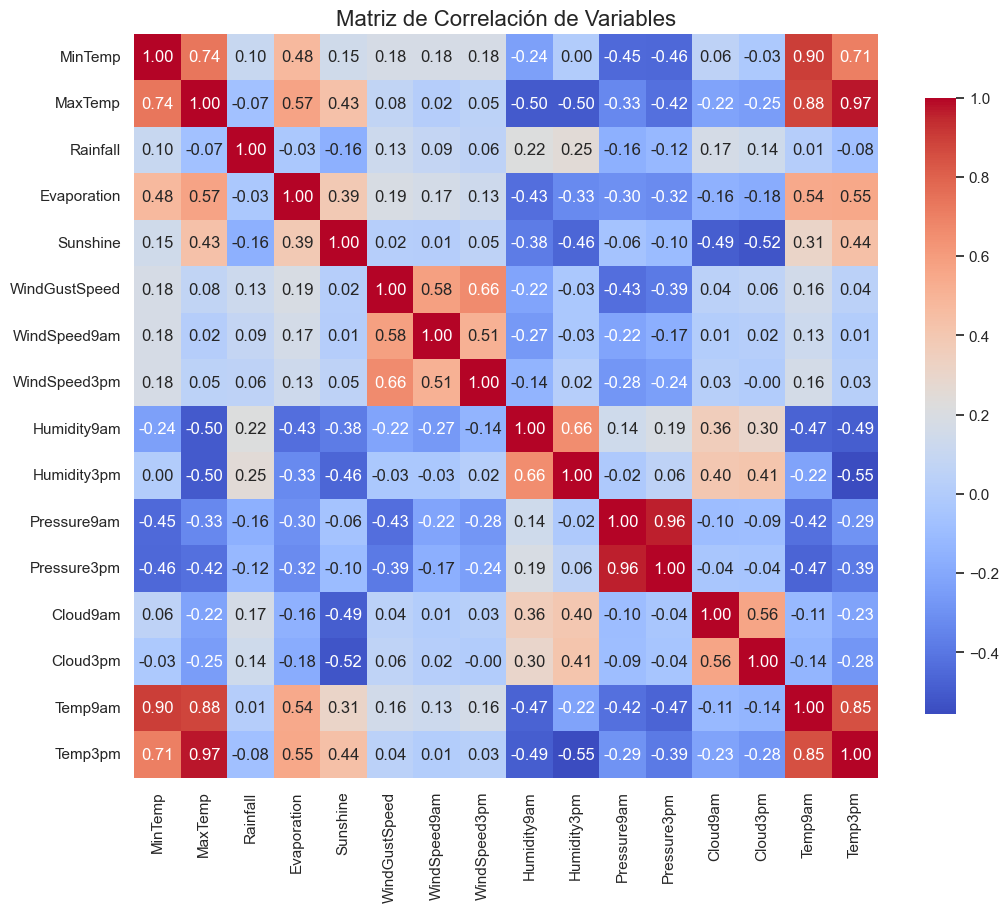

In [157]:
plt.figure(figsize=(12, 10))


sns.heatmap(X_train.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación de Variables', fontsize=16)
plt.show()

In [158]:
# Aplanar la matriz de correlación y resetear los índices
correlation_pairs = X_train.select_dtypes(include=['number']).unstack().reset_index()

# Renombrar las columnas
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Eliminar las correlaciones duplicadas (diagonal y columnas)
correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]

# Ordenar por la mayor correlación positiva
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)

# Eliminar duplicados y valores nulos
correlation_pairs.drop_duplicates(subset=['Correlation'], inplace=True)
correlation_pairs.dropna(inplace=True)

# Resetear el índice
correlation_pairs.reset_index(drop=True, inplace=True)

# Mostrar las 10 pares de variables con mayor correlación positiva y las 10 pares de variables con mayor correlación negativa
print(correlation_pairs.head(10), '\n', correlation_pairs.tail(10))

    Variable 1  Variable 2  Correlation
0  Pressure9am      112562       1041.0
1  Pressure9am       46947       1040.6
2  Pressure9am      130172       1040.3
3  Pressure9am       49934       1040.2
4  Pressure9am       46893       1040.1
5  Pressure9am      130457       1040.0
6  Pressure9am         964       1039.9
7  Pressure9am       56066       1039.5
8  Pressure9am       49592       1039.4
9  Pressure9am      112561       1039.3 
      Variable 1  Variable 2  Correlation
1396    MinTemp       47323         -6.8
1397    MinTemp       46848         -6.9
1398    MinTemp       54053         -7.0
1399    Temp9am       54754         -7.2
1400    MinTemp       54755         -7.3
1401    MinTemp       54052         -7.5
1402    MinTemp       54043         -7.6
1403    MinTemp       46923         -8.0
1404    MinTemp       49963         -8.2
1405    MinTemp       52254         -8.5


### **Interpretación Correlaciones (TOTO)**

## **Por qué trabajamos con atípicos** 

## Estandarizacion y escalado de datos ##

Gracias a los boxplots hechos anteriormente, podemos ver una cantidad de valores atipicos grande, entonces lo que mas nos conviene es usar un escalado robusto

# Punto 2

Implementar la solución del problema de clasificación con regresión logística.

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score

In [161]:
logist_class = make_pipeline(RobustScaler(), LogisticRegression(random_state=42))
logist_class.fit(X_train_encoded,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [162]:
logist_class.predict(X_val_encoded)

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

## Matriz de Confusión

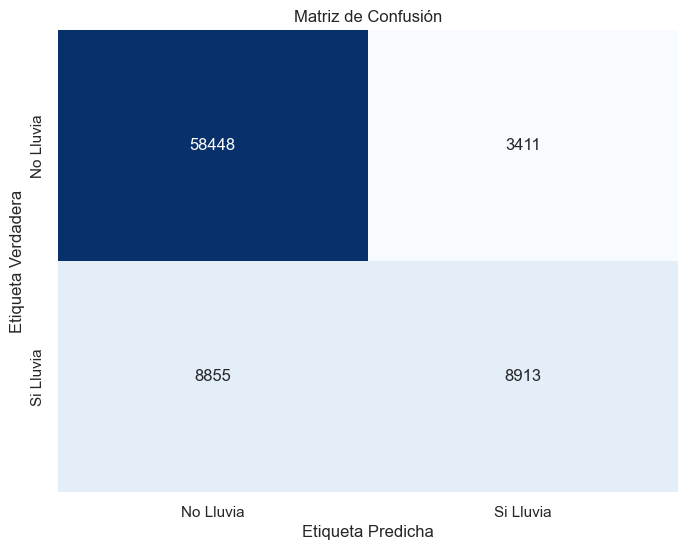

In [169]:
# Predecir las etiquetas en el conjunto de prueba o validación (usa el conjunto que prefieras)
y_train_pred = logist_class.predict(X_train_encoded)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Lluvia', 'Si Lluvia'], yticklabels=['No Lluvia', 'Si Lluvia'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

Definiendo clase Positiva a "No Lluvia"
- Falsos Positivos: hubo 3411 dias en los que se predijo que no iba a llover y llovió.
- Falsos Negativos: Hubo 8913 días en los que predijo que iba a llover y no llovió.

Esto tiene sentido ya que el dataset está desbalanceado con mayor proporción de días "No llueve" y, como se dijo antes, se priorizó predecir mas veces bien la variable No llueve teniendo 3411 mal predichos y 58448 bien predichos, y "Llueve" obtuvo menor predicciones bien, de hecho predice a la mitad bien solamente.


In [180]:
# Calcular las métricas
metrics_train = {
    'Modelo' : 'Predicciones Train sin hiperparametros ajustados',
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred, average='weighted'),
    "Recall": recall_score(y_train, y_train_pred, average='weighted'),
    "F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "MCC": matthews_corrcoef(y_train, y_train_pred),
    "Cohen's Kappa": cohen_kappa_score(y_train, y_train_pred),
    'AUC Roc' : roc_auc_score(y_val, logist_class.predict_proba(X_val_encoded)[:, 1])
}

In [181]:
metrics_train = pd.DataFrame([metrics_train])
metrics_train

,Modelo,Accuracy,Precision,Recall,F1 Score,MCC,Cohen's Kappa,AUC Roc
0,Predicciones Train sin hiperparametros ajustados,0.845957,0.836029,0.845957,0.835269,0.513973,0.501221,0.865548


## Curva ROC

Trazar curvas ROC para cada modelo. Comenten cuáles serían los umbrales adecuados a utilizar; ¿cómo podrían calcular el mejor umbral? ¿Es 0.5 el mejor?